<a href="https://colab.research.google.com/github/Karishma-Kuria/ML-Interactive-Dashboard/blob/main/ML_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **With the football team information from 2009 to 2019 below classification and regression algorithms can predict:**

### This colab contains:

### 1. Interactive Dashboard experience for the results of both Regression and Classification algorithms used.
### 2. Dashboard have multiple tabls to show the performance of model, f1 score, confusion matrix, shap results, decision tree etc.
### 3. It also contains various methods used to check the feature importance such as using shap values and pick the top features which are relevant for the prediction.
### 4. Smote has been used to do upsampling and downsampling of data.
### 5. Various Regression and Classification algorithms are used to predict the target class and their results are compared.


## **1. Predict which team (Home Team / Away Team) can win the match**



The dataset contains details of 9,074 games, totaling 941,009 events which were played in the biggest 5 European football leagues: Spain, England, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017. The dataset contains 3 files:

dictionary.txt
events.csv
ginf.csv

For the problem statement 2nd we have identified new dataset.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

### **Loading dataset**

In [ ]:
game_path_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_path_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_path_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_path_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_path_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_path_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_path_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_path_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_path_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_path_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"


In [ ]:
ds1 = pd.read_csv(game_path_2018_2019) 
ds2 = pd.read_csv(game_path_2017_2018)
ds3 = pd.read_csv(game_path_2016_2017)
ds4 = pd.read_csv(game_path_2015_2016)
ds5 = pd.read_csv(game_path_2014_2015)
ds6 = pd.read_csv(game_path_2013_2014)
ds7 = pd.read_csv(game_path_2012_2013)
ds8 = pd.read_csv(game_path_2011_2012)
ds9 = pd.read_csv(game_path_2010_2011)
ds10 = pd.read_csv(game_path_2009_2010)

frames = [ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10]
game_data = pd.concat(frames,ignore_index=True)
game_data.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install hvplot

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as data
import hvplot.pandas
import panel as pn

select_features = pn.widgets.Select(options=['H', 'A', 'D'], name = 'FTR')
select_cyc  = pn.widgets.IntSlider(name='FTR',start = 0, end = 10, step=1)
select_org = pn.widgets.Select(options=['North America', 'Asia', 'Europe'], name = 'origin')
select_cyc1  = pn.widgets.IntSlider(name='cyl',start = 8, end = 4, step=1)
@pn.depends(select_org, select_cyc1)

def exp_plot(select_org, select_cyc1):
  return data[(data.origin==select_org) & (data.cyl==select_cyc1)].sort_values(by='mpg').hvplot(x='mpg', y='hp')
dashboard = pn.Column(select_org, select_cyc1, exp_plot)
dashboard

Column
    [0] Select(name='origin', options=['North America', ...], value='North America')
    [1] IntSlider(end=4, name='cyl', start=8, value=8)
    [2] ParamFunction(function)

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews.operation.timeseries import rolling, rolling_outlier_std
def load_symbol(symbol, variable, **kwargs):
    df = game_data['FTR', 'FTAG']
    #df['date'] = df.date.astype('datetime64[ns]')
    return hv.Curve(df, ('FTAG', 'FTAG'), variable).opts(framewise=True)

stock_symbols = ['H', 'A', 'D']
variables = ['H', 'A', 'D']
dmap = hv.DynamicMap(load_symbol, kdims=['Full Time Result','Variable'])
dmap = dmap.redim.values(Symbol=stock_symbols,Variable=variables)

dmap.opts(framewise=True)
rolling(dmap, rolling_window=2)

DynamicMap cannot be displayed without explicit indexing as 'Full Time Result' dimension(s) are unbounded. 
Set dimensions bounds with the DynamicMap redim.range or redim.values methods.

:DynamicMap   [Full Time Result,Variable]

In [ ]:
# shape of the game info and game data
print('Shape of game dataset''\n',game_data.shape)

Shape of game dataset
 (3800, 77)


### **Dropping features which are not imortant.**

In [ ]:
game_data.drop(columns= ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee'], inplace= True)

In [ ]:
# check for unique values
print('Game dataset''\n',game_data.index.is_unique)

Game dataset
 True


In [ ]:
# check for missing values
print('Game dataset''\n',game_data.isna().sum())

Game dataset
 FTHG       0
FTAG       0
FTR        0
HTHG       0
HTAG       0
        ... 
BSD     2280
BSA     2280
SBH     2660
SBD     2660
SBA     2660
Length: 72, dtype: int64


In [ ]:
game_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,...,1940.000000,1519.000000,1519.00000,1519.000000,1520.000000,1520.000000,1520.000000,1140.000000,1140.000000,1140.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181316,11.229211,6.014211,4.763947,10.618684,11.133421,...,4.893897,2.601745,3.79973,4.597367,2.613954,3.803553,4.816303,2.577483,3.773650,4.598114
std,1.322363,1.160788,0.838739,0.735319,5.514299,4.687029,3.443571,2.891895,3.397368,3.580877,...,3.890396,1.578228,0.87315,3.349595,1.630953,0.868362,3.853876,1.631384,0.878153,3.517203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.250000,1.100000,3.00000,1.250000,1.100000,3.000000,1.220000,1.080000,3.100000,1.200000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,...,2.400000,1.600000,3.25000,2.400000,1.620000,3.250000,2.500000,1.570000,3.250000,2.400000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,11.000000,11.000000,...,3.500000,2.100000,3.40000,3.400000,2.100000,3.400000,3.400000,2.100000,3.400000,3.275000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,...,5.800000,2.850000,4.00000,5.500000,2.800000,4.000000,5.500000,2.750000,3.800000,5.500000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,24.000000,26.000000,...,29.000000,12.000000,8.50000,21.000000,13.000000,8.500000,26.000000,12.000000,8.500000,21.000000


In [ ]:
# check for missing data
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FTHG      3800 non-null   int64  
 1   FTAG      3800 non-null   int64  
 2   FTR       3800 non-null   object 
 3   HTHG      3800 non-null   int64  
 4   HTAG      3800 non-null   int64  
 5   HTR       3800 non-null   object 
 6   HS        3800 non-null   int64  
 7   AS        3800 non-null   int64  
 8   HST       3800 non-null   int64  
 9   AST       3800 non-null   int64  
 10  HF        3800 non-null   int64  
 11  AF        3800 non-null   int64  
 12  HC        3800 non-null   int64  
 13  AC        3800 non-null   int64  
 14  HY        3800 non-null   int64  
 15  AY        3800 non-null   int64  
 16  HR        3800 non-null   int64  
 17  AR        3800 non-null   int64  
 18  B365H     3800 non-null   float64
 19  B365D     3800 non-null   float64
 20  B365A     3800 non-null   floa

# **2. Predict which team (Home Team / Away Team) can win the match.**

## **EDA**

Let's check if we have a balanced dataset for game data.

In [ ]:
game_data["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

So as per the above information our data is not well balanced since the number of home results are more.

Determining Latent Variables.

**Latent Variable# 1**

**Away Hit Rate**: It is a rate at which away teams scored a goal against total shots played. It is calculated by taking the ratio of Full time away goals and total away shots.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [ ]:
game_data["AHR"] = game_data["FTAG"]/game_data["AS"]

**Latent Variable# 2**

**The Total Shots Ratio (TSR)**: It is a rate to visualize how well teams play a match when it comes to conceding and taking shots.

TSR = $\frac{Total shots for}{Total shots for + total shots against}$

In [ ]:
game_data["TSR"] = game_data["HS"] / (game_data["HS"] + game_data["AS"])

**Latent Variable# 3**

**Home Hit Rate(HHR)**: It is a rate at which home teams scored a goal against total shots played. It is calculated by taking the ratio of Full time home goals and total home shots.

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [ ]:
game_data["HHR"] = game_data["FTHG"]/game_data["HS"]

In [ ]:
game_data.drop(columns=["HS","AS"], inplace=True)

In [ ]:
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST,HF,AF,...,GBA,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR
0,2,1,H,1,0,H,6,4,11,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076923,0.380952,0.250000
1,2,0,H,1,0,H,4,1,11,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.545455,0.166667
2,0,2,A,0,1,A,6,9,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.600000,0.000000
3,0,3,A,0,2,A,1,4,9,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230769,0.315789,0.000000
4,1,2,A,1,2,A,2,5,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133333,0.500000,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,D,13,4,12,11,...,9.00,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619
3796,0,0,D,0,0,D,6,7,15,11,...,1.55,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000
3797,4,0,H,2,0,H,13,4,10,4,...,19.00,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222
3798,1,1,D,1,1,D,8,6,12,7,...,1.90,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333


### **Univariant analysis: single attribute analysis**

Full time result(FTR) for each result outcome.

In [ ]:
game_data["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

Text(0, 0.5, 'Count')

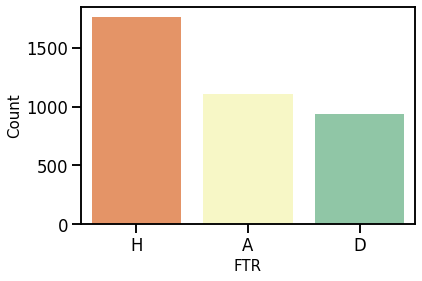

In [ ]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=game_data,x="FTR",palette="Spectral",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observation**:

1.   As per the counts shown above, it is clear that home team has more wins.
2.   It can also be infered that the Away team is more likely to loose or get a draw.



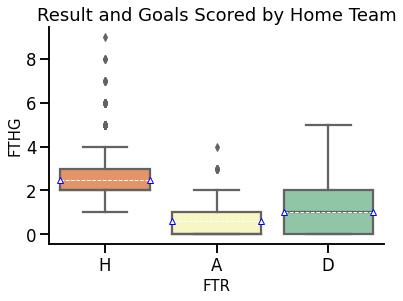

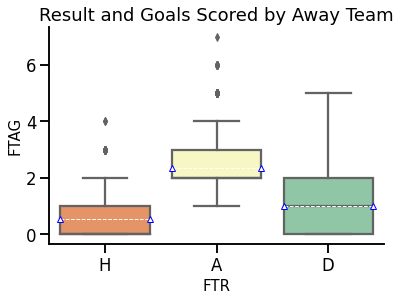

In [ ]:
sns.boxplot(data=game_data,x="FTR",y="FTHG",palette="Spectral", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=game_data,x="FTR",y="FTAG",palette="Spectral", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

**Observation**:

**Away Team** :

1.   The winning score goalmean is 2.1.
2.   If its a draw then the mean is 0.9 goals.
3.   In the case of lossing the match the mean is 0.6 goals.

**Home Team** :


1.   The winning score goalmean is 2.5.
2.   If its a draw then the mean is 0.9 goals.
3.   In the case of lossing the match the mean is 0.5 goals.

In conclusion Home team has scored more goals.





## **Bi-Variate analysis**

Lets visualize the relationship between features by plotting a pairplot graphs.

In [ ]:
game_data.index

RangeIndex(start=0, stop=3800, step=1)

In [ ]:
sns.pairplot(game_data,hue="FTR",palette="Spectral")

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f27db917c20> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f27db924290> (for post_execute):


KeyboardInterrupt: ignored



**Observations:**

FTAG (Full time Away Goal) and FTHG (Full time Home Goal)   are the main features which clearly explains who will win.  So to predict full time result (FTR) these two features can be used.

So the team which has maximum goals in the match wins the match.


Let's check if the team just wins at Half time or does they win full match.

In [ ]:
sns.countplot(data=game_data,x="HTR",hue="FTR",palette="Spectral")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

**Graph Description**:

H : Shows that Home team leading at Half Time.

A : Shows that Away team leading at Half Time.

D : Shows that game was level at Half Time.

Blue Bar shows the count when team Won.

Orange Bar shows the count when team had a Draw.

Green Bar shows the count when team Lost the game at Full time.

**Observation**:

The team which Leads the Half Time almost always goes on to winning the game at Full time.

If at Half Time the game is leveled than it is more likely that Home team will win the match as compared to Away team. Although most likely the outcome is a Draw.

**Conclusion**
1. There HTR (Half Time Result) is crutial feature to determine who will win the match.
2. Goals scored at Full time for both Away and Home determines the overall result of the match.
3. There is a higher chances of Home team winning the match.



##**Data Prepartion - Train/Test split Dataset**

**Determine continous and categorical features.**

In [ ]:
categorical_cols = game_data.dtypes[game_data.dtypes == object]
categorical_cols

FTR    object
HTR    object
dtype: object

In [ ]:
# filter by categorical strings 
categorical_cols = game_data.dtypes[game_data.dtypes == object]  
categorical_cols = categorical_cols.index.tolist()  # list of categorical fields

game_data[categorical_cols].head().T

,0,1,2,3,4
FTR,H,H,A,A,A
HTR,H,H,A,A,A


In [ ]:
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST,HF,AF,...,GBA,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR
0,2,1,H,1,0,H,6,4,11,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076923,0.380952,0.250000
1,2,0,H,1,0,H,4,1,11,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.545455,0.166667
2,0,2,A,0,1,A,6,9,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.600000,0.000000
3,0,3,A,0,2,A,1,4,9,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230769,0.315789,0.000000
4,1,2,A,1,2,A,2,5,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133333,0.500000,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,D,13,4,12,11,...,9.00,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619
3796,0,0,D,0,0,D,6,7,15,11,...,1.55,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000
3797,4,0,H,2,0,H,13,4,10,4,...,19.00,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222
3798,1,1,D,1,1,D,8,6,12,7,...,1.90,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333


Encode FTR (Full Time Result) which is target column

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()
game_data['target_feat'] = target_labelencoder.fit_transform(game_data['FTR'])
game_data.info
game_data['target_feat'] 
'''
#target_labelencoder = LabelEncoder()
game_data['target_feat'] = game_data['FTR']
game_data.info
game_data['target_feat'] 
'''

"\n#target_labelencoder = LabelEncoder()\ngame_data['target_feat'] = game_data['FTR']\ngame_data.info\ngame_data['target_feat'] \n"

In [ ]:
target_cat = ['H','A','D']
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST,HF,AF,...,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR,target_feat
0,2,1,H,1,0,H,6,4,11,8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.076923,0.380952,0.250000,2
1,2,0,H,1,0,H,4,1,11,9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.545455,0.166667,2
2,0,2,A,0,1,A,6,9,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.600000,0.000000,0
3,0,3,A,0,2,A,1,4,9,8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.230769,0.315789,0.000000,0
4,1,2,A,1,2,A,2,5,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0.133333,0.500000,0.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,D,13,4,12,11,...,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619,2
3796,0,0,D,0,0,D,6,7,15,11,...,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000,1
3797,4,0,H,2,0,H,13,4,10,4,...,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222,2
3798,1,1,D,1,1,D,8,6,12,7,...,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333,1


In [ ]:
game_data = game_data.replace(np.nan, 0)

In [ ]:
categorical_features = ["HTR"]
X = game_data[categorical_features]

colum_transformer = ColumnTransformer([('categorical', OneHotEncoder(), categorical_features),], remainder='passthrough')

game_data['HTR'] = colum_transformer.fit_transform(X)
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST,HF,AF,...,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR,target_feat
0,2,1,H,1,0,0.0,6,4,11,8,...,0.00,0.00,0.00,0.00,0.00,0.00,0.076923,0.380952,0.250000,2
1,2,0,H,1,0,0.0,4,1,11,9,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.545455,0.166667,2
2,0,2,A,0,1,1.0,6,9,9,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.200000,0.600000,0.000000,0
3,0,3,A,0,2,1.0,1,4,9,8,...,0.00,0.00,0.00,0.00,0.00,0.00,0.230769,0.315789,0.000000,0
4,1,2,A,1,2,1.0,2,5,11,12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.133333,0.500000,0.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,0.0,13,4,12,11,...,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619,2
3796,0,0,D,0,0,0.0,6,7,15,11,...,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000,1
3797,4,0,H,2,0,0.0,13,4,10,4,...,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222,2
3798,1,1,D,1,1,0.0,8,6,12,7,...,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333,1


In [ ]:
#categorical_feature = ["HTR"]
#numerical_features = ["FTAG","FTHG","HTAG","HTHG"]
y = game_data['target_feat'].values
test_labelencoder = LabelEncoder()
#game_data['encoded_HTR'] = test_labelencoder.fit_transform(game_data['HTR'])
game_data

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST,HF,AF,...,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR,target_feat
0,2,1,H,1,0,0.0,6,4,11,8,...,0.00,0.00,0.00,0.00,0.00,0.00,0.076923,0.380952,0.250000,2
1,2,0,H,1,0,0.0,4,1,11,9,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.545455,0.166667,2
2,0,2,A,0,1,1.0,6,9,9,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.200000,0.600000,0.000000,0
3,0,3,A,0,2,1.0,1,4,9,8,...,0.00,0.00,0.00,0.00,0.00,0.00,0.230769,0.315789,0.000000,0
4,1,2,A,1,2,1.0,2,5,11,12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.133333,0.500000,0.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,H,0,0,0.0,13,4,12,11,...,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619,2
3796,0,0,D,0,0,0.0,6,7,15,11,...,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000,1
3797,4,0,H,2,0,0.0,13,4,10,4,...,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222,2
3798,1,1,D,1,1,0.0,8,6,12,7,...,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333,1


In [ ]:
#game_data.drop(columns=["encoded_HTR"], inplace=True)

In [ ]:
game_data.drop(columns = ['FTR'], inplace=True)

In [ ]:
game_data

,FTHG,FTAG,HTHG,HTAG,HTR,HST,AST,HF,AF,HC,...,BSH,BSD,BSA,SBH,SBD,SBA,AHR,TSR,HHR,target_feat
0,2,1,1,0,0.0,6,4,11,8,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.076923,0.380952,0.250000,2
1,2,0,1,0,0.0,4,1,11,9,7,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.545455,0.166667,2
2,0,2,0,1,1.0,6,9,9,11,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.200000,0.600000,0.000000,0
3,0,3,0,2,1.0,1,4,9,8,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.230769,0.315789,0.000000,0
4,1,2,1,2,1.0,2,5,11,12,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.133333,0.500000,0.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,0,0,0.0,13,4,12,11,14,...,1.30,5.00,10.00,1.29,5.00,8.50,0.000000,0.677419,0.047619,2
3796,0,0,0,0,0.0,6,7,15,11,2,...,6.00,3.75,1.57,6.00,3.75,1.50,0.000000,0.366667,0.000000,1
3797,4,0,2,0,0.0,13,4,10,4,10,...,1.11,7.50,23.00,1.11,7.50,15.00,0.000000,0.818182,0.222222,2
3798,1,1,1,1,0.0,8,6,12,7,4,...,4.20,3.60,1.80,4.00,3.40,1.80,0.058824,0.413793,0.083333,1


### **Target Class Distribution**

Class=2, n=1758 (46.263%)
Class=0, n=1102 (29.000%)
Class=1, n=940 (24.737%)


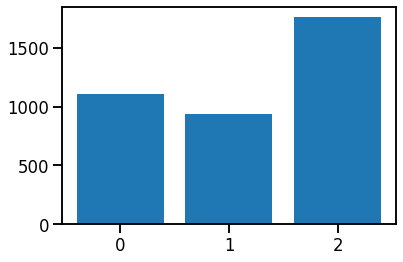

In [ ]:
# summarize distribution
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## **Feature importance analysis and selection using SHAP**

In [ ]:
!pip install shap

In [ ]:
import shap
from shap import TreeExplainer
from shap import summary_plot
X_train, X_test, y_train, y_test = train_test_split(game_data, y, test_size=0.25, random_state=42, stratify = y)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (2850, 73), y_train: (2850,), X_test: (950, 73), y_test: (950,)


In [ ]:
X_train = X_train.replace(np.nan, 0)
X_test =  X_test.replace(np.nan, 0)

**Applying RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(3, 2850, 73)


So from the above classifocation result we can infer that:

1. Number of classes: 3 . 
2. Number of datapoints. We have local SHAP values per datapoint: 2850

3. Number of features. We have SHAP value per every feature: 73

In [ ]:
print(shap_values[0].shape)

(2850, 73)


1. SHAP values for every datapoint:  2850

2. SHAP value contributions for every feature: 73


Finally, we can run a sanity check to make it sure real predictions from model are the same as those predicted by shap.

To do so, we'll (1) swap the first 2 dimensions of shap_values, (2) sum up SHAP values per class for all features, (3) add SHAP values to base values:

In [ ]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

True

Then you may proceed to summary_plot that will show feature rankings based on SHAP values on a per class basis. For class 3 this will be:

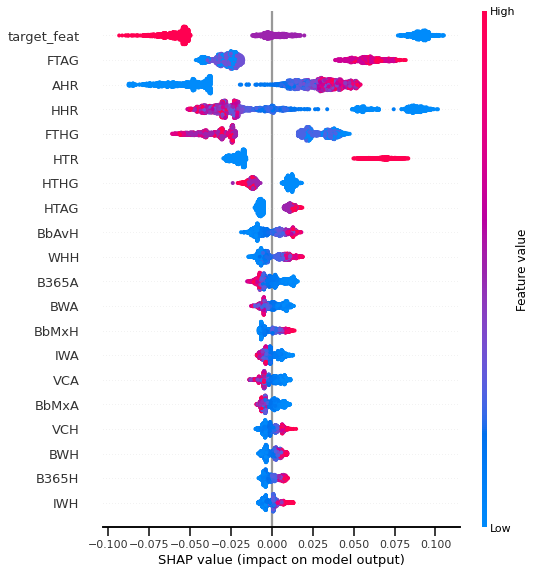

In [ ]:
summary_plot(shap_values[0],X_train)

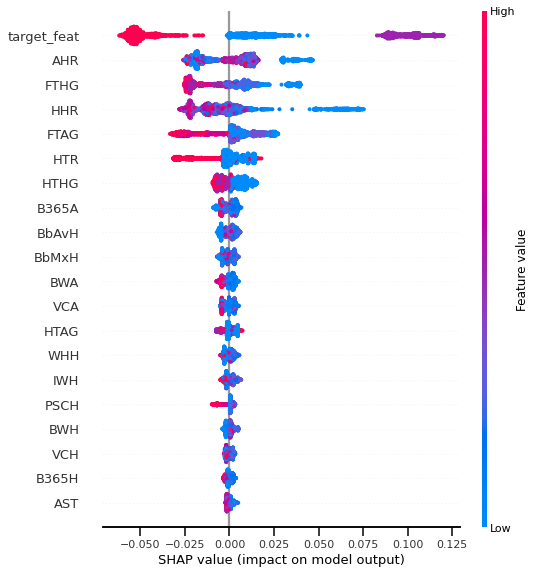

In [ ]:
summary_plot(shap_values[1],X_train)

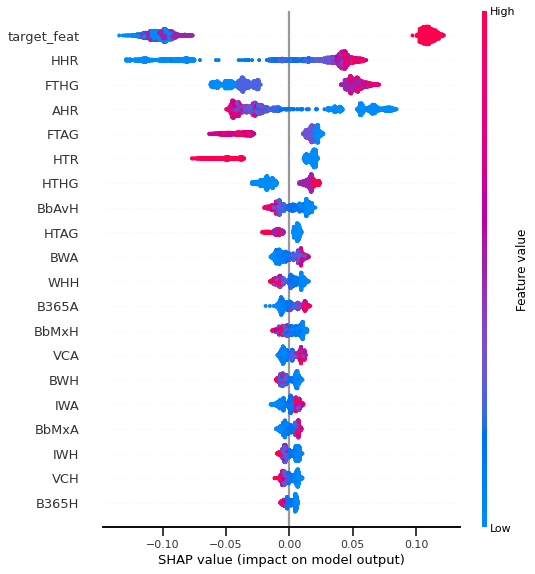

In [ ]:
summary_plot(shap_values[2],X_train)

In [ ]:
# predicting on test
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[274   0   2]
 [ 20 164  51]
 [  0   0 439]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       276
           1       1.00      0.70      0.82       235
           2       0.89      1.00      0.94       439

    accuracy                           0.92       950
   macro avg       0.94      0.90      0.91       950
weighted avg       0.93      0.92      0.92       950



### **Dashboard: Explaining data and model prediction using dashboard.**

Using OneHot Encoding to Encode the categorical feature. Also using MinMax Scaler to standarize the numerical features.

In [ ]:
categorical_feature = ["HTR"]
numerical_features = ["FTAG","FTHG","HTAG","HTHG","HHR", "AHR", "TSR"]
#y = game_data['target_feat'].values
X = game_data[categorical_feature + numerical_features]
#colum_transformer = ColumnTransformer([('numerical', MinMaxScaler(), numerical_features),('categorical', OneHotEncoder(), categorical_feature),], remainder='passthrough')
#X = colum_transformer.fit_transform(X)
#colum_transformer = ColumnTransformer([('numerical', MinMaxScaler(), numerical_features),('categorical', OneHotEncoder(), categorical_feature),], remainder='passthrough')
#X = colum_transformer.fit_transform(X)
print(X)

      HTR  FTAG  FTHG  HTAG  HTHG       HHR       AHR       TSR
0     0.0     1     2     0     1  0.250000  0.076923  0.380952
1     0.0     0     2     0     1  0.166667  0.000000  0.545455
2     1.0     2     0     1     0  0.000000  0.200000  0.600000
3     1.0     3     0     2     0  0.000000  0.230769  0.315789
4     1.0     2     1     2     1  0.066667  0.133333  0.500000
...   ...   ...   ...   ...   ...       ...       ...       ...
3795  0.0     0     1     0     0  0.047619  0.000000  0.677419
3796  0.0     0     0     0     0  0.000000  0.000000  0.366667
3797  0.0     0     4     0     2  0.222222  0.000000  0.818182
3798  0.0     1     1     1     1  0.083333  0.058824  0.413793
3799  0.0     1     2     1     1  0.142857  0.090909  0.560000

[3800 rows x 8 columns]


In [ ]:
print('Shape of X',X.shape, '\n')
print('Shape of y',y.shape, '\n')

Shape of X (3800, 8) 

Shape of y (3800,) 



In [ ]:
X

,HTR,FTAG,FTHG,HTAG,HTHG,HHR,AHR,TSR
0,0.0,1,2,0,1,0.250000,0.076923,0.380952
1,0.0,0,2,0,1,0.166667,0.000000,0.545455
2,1.0,2,0,1,0,0.000000,0.200000,0.600000
3,1.0,3,0,2,0,0.000000,0.230769,0.315789
4,1.0,2,1,2,1,0.066667,0.133333,0.500000
...,...,...,...,...,...,...,...,...
3795,0.0,0,1,0,0,0.047619,0.000000,0.677419
3796,0.0,0,0,0,0,0.000000,0.000000,0.366667
3797,0.0,0,4,0,2,0.222222,0.000000,0.818182
3798,0.0,1,1,1,1,0.083333,0.058824,0.413793


In [ ]:
# split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
X_test

,HTR,FTAG,FTHG,HTAG,HTHG,HHR,AHR,TSR
1003,0.0,0,0,0,0,0.000000,0.000000,0.562500
594,0.0,1,3,0,2,0.176471,0.142857,0.708333
461,0.0,2,4,1,1,0.285714,0.125000,0.466667
3018,1.0,4,1,1,0,0.071429,0.307692,0.518519
3091,0.0,0,0,0,0,0.000000,0.000000,0.370370
...,...,...,...,...,...,...,...,...
1455,0.0,1,2,1,1,0.153846,0.076923,0.500000
3614,0.0,0,5,0,3,0.217391,0.000000,0.676471
660,1.0,1,2,1,0,0.095238,0.100000,0.677419
630,0.0,1,5,0,4,0.333333,0.090909,0.576923


In [ ]:
!pip install explainerdashboard

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from explainerdashboard.datasets import feature_descriptions

#X_train, y_train, X_test, y_test = titanic_survive()
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
model = RandomForestRegressor(n_estimators=50, max_depth=10).fit(X_train, y_train)
#explainer = ClassifierExplainer(model, X_test, y_test, cats=['Sex', 'Deck', 'Embarked'], descriptions=feature_descriptions, labels=['Not survived', 'Survived'])
#ExplainerDashboard(explainer).run()

explainer = RegressionExplainer(model, X_test, y_test,target='FTR')
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')


Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard

<IPython.core.display.Javascript object>

### **Classifier Dashboard**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard.datasets import feature_descriptions
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
model = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test,target='FTR',labels=['H', 'A', 'D'])
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setti

<IPython.core.display.Javascript object>

## **SMOTE Sampling**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_res)

In [ ]:
# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
	per = v / len(y_res) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

**Checking Prediction after sampling**

In [ ]:
from sklearn.metrics import classification_report

classifier = RandomForestClassifier(n_estimators=100, max_depth=3)
#Fitting the training data
classifier.fit(X_res, y_res)
#Predicting on test
y_pred1=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

## **Regression**

Implementing Muller Loop to run it on the training dataset against following Regression algorithms and display their accuracy:

1. LinearRegression
2. LogisticRegression
3. MLPRegressor
4. RandomForestRegressor
5. AdaBoost
6. KNNRegressor

In [ ]:
regression_algos = ["LogisticRegression","AdaBoost", "MLPRegressor", 
                    "LinearRegression", "KNNRegressor","RandomForestRegressor"
                   ]

classifiers = [
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    RandomForestRegressor(max_depth=2, random_state=0),
    ]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(regression_algos, classifiers):
    start_time = time.time()
    clf.fit(X_res, y_res)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo

In [ ]:
# plot the output score for all the algos
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(18,8))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

## **Classification using Decision Tree**

In [ ]:
from sklearn import tree

decision_Tree_class = tree.DecisionTreeClassifier()
decision_Tree_class = decision_Tree_class.fit(X,y)

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(decision_Tree_class)

In [ ]:
import graphviz 
data = tree.export_graphviz(decision_Tree_class, out_file=None) 
graph_val = graphviz.Source(data) 
graph_val.render("Football")

In [ ]:
data = tree.export_graphviz(decision_Tree_class, out_file=None, 
                         feature_names=column_names,  
                         class_names=target_cat,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data)  
graph 

### **Classification**

Implementing Muller Loop to run it on the training dataset against following algorithms:

1.   NaiveBayes Classifier
2.   KNN Classifier
3.   RandomForest Classifier
4.   XGB Classifier
5. DecisionTreeClassifier

In [ ]:
class_algo = ["DecisionTreeClassifier", "RandomForest Classifier","KNN Classifier", 
         "NaiveBayes Classifier", 
         "XGB Classifier", ]

classifiers = [
    DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    ]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(class_algo, classifiers):
    start_time = time.time()
    clf.fit(X_res, y_res)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Classification  Algorithm = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo


In [ ]:
plt.figure(figsize=(18,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

**K-Fold Technique**

In [ ]:
'''
split the training dataset into 3 folds using KFold Technique 
and run the each fold against the give list of classfiers and check their accuracy.
'''
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    print(100*'*' )
    score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'RandomForestClassifier Scores for each fold are: {score}')
    print(f'RandomForestClassifier Average score: {"{:.2f}".format(score.mean())}')
    print(100*'-' )

    score = cross_val_score(GaussianNB(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'GaussianNB Scores for each fold are: {score}')
    print(f'GaussianNB Average score: {"{:.2f}".format(score.mean())}')
    print(100*'-' )
    score = cross_val_score(XGBClassifier(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'XGBClassifier Scores for each fold are: {score}')
    print(f'XGBClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(100*'-' )
    score = cross_val_score(KNeighborsClassifier(n_neighbors = 5),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'KNeighborsClassifier Scores for each fold are: {score}')
    print(f'KNeighborsClassifier Average score: {"{:.2f}".format(score.mean())}')

    print(100*'-' )
    score = cross_val_score(DecisionTreeClassifier(),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'DecisionTreeClassifier Scores for each fold are: {score}')
    print(f'DecisionTreeClassifier Average score: {"{:.2f}".format(score.mean())}')


Finalize the outcome depending on voting and using the output of all the models.

In [ ]:
classifiers_list = [('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB()),
            ('random forst classifier', ensemble.RandomForestClassifier()),
            ('XGB Classifier', XGBClassifier())]

In [ ]:
voting_classifier_model = VotingClassifier(classifiers_list, voting='soft')
voting_classifier_model.fit(X_train, y_train)

y_pred = voting_classifier_model.predict(X_test)
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")

Result

In [ ]:
predicted_result = classification_report(y_test, y_pred)
print(predicted_result)

Confusion matrix

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred, labels=voting_classifier_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=voting_classifier_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical',cmap = "Spectral")